<a href="https://colab.research.google.com/github/anindo78/Statistical-Programming-with-Colab-Notebooks/blob/main/Monte_Carlo_and_Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monte Carlo **Simulation**

**Concept:**
Monte Carlo simulation is a method of using randomness to solve problems that might be deterministic in principle. It’s often used when direct computation is too complex.

Example (Intuition):

Imagine estimating the value of π by randomly throwing darts at a square dartboard that contains a quarter-circle. The ratio of darts landing inside the circle vs. total darts thrown can help estimate π.

Use Cases:

Estimating probabilities when

1.    no closed-form formula exists

2.   Risk analysis (e.g., in finance, supply chain)

3.   Simulating complex systems (like queues, games, etc.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

# Points inside quarter circle
inside_circle = x**2 + y**2 <= 1
pi_estimate = (np.sum(inside_circle) / n) * 4

print(f"Estimated value of π: {pi_estimate:.4f}")


Estimated value of π: 3.1440


# **Case Study: Portfolio Risk Simulation**



Problem Statement:
You manage a portfolio worth $100,000. The daily returns are assumed to follow a normal distribution with:

Mean daily return = 0.05%

Standard deviation = 1%

**Question:**
Using Monte Carlo simulation, estimate the probability that the portfolio value drops below $95,000 after 30 trading days.


**Step-by-Step Plan**



1. Simulate 30 daily returns over 10,000 simulated paths.

2. For each path, compute the portfolio value after 30 days.

3. Estimate the proportion of paths where the final portfolio value is below $95,000.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial setup
initial_value = 100000
mean_daily_return = 0.0005  # 0.05%
std_dev_daily = 0.01        # 1%
days = 30
simulations = 10000



# Generate random returns: shape (simulations, days)
random_returns = np.random.normal(loc=mean_daily_return, scale=std_dev_daily, size=(simulations, days))

In [ ]:
random_returns[0:6, 0:6]

# Compute cumulative return for each simulation
cumulative_returns = np.prod(1 + random_returns, axis=1)

# Final portfolio values
final_values = initial_value * cumulative_returns

Estimated probability of portfolio dropping below $95,000: 0.1186


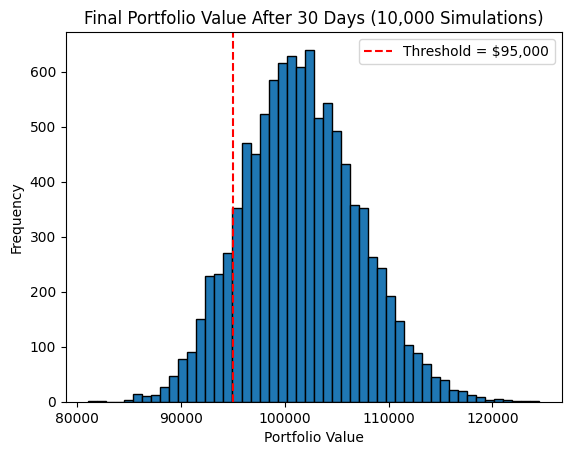

In [ ]:
# Probability estimation
prob_drop_below_95k = np.mean(final_values < 95000)

print(f"Estimated probability of portfolio dropping below $95,000: {prob_drop_below_95k:.4f}")

# Optional: plot the distribution
plt.hist(final_values, bins=50, edgecolor='black')
plt.axvline(95000, color='red', linestyle='dashed', label='Threshold = $95,000')
plt.title("Final Portfolio Value After 30 Days (10,000 Simulations)")
plt.xlabel("Portfolio Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## **Case Study: Dice Game Simulation**


**Problem Statement:**

You roll two six-sided dice. If the sum is 7 or 11, you win. Otherwise, you lose.

**Question:**

Use Monte Carlo simulation to estimate the probability of winning this game.



In [ ]:
#simulate roll of six sided die

o1 = np.random.randint(1,7,10000)
o2 = np.random.randint(1,7,10000)

sum_of_throws = o1 + o2
print(sum_of_throws.shape)
sum_of_throws[0:6]

(10000,)


array([ 5, 12, 10,  8,  7,  9])

Interpretation
The theoretical probability of winning this game is:

𝑃
(
sum
=
7
)
=
6 /
36
,
𝑃
(
sum
=
11
)
=
2 /
36
⇒
Total
=
8 /
36
≈
0.2222
P(sum=7)=
36
6
​
 ,P(sum=11)=
36
2
​
 ⇒Total=
36
8
​
 ≈0.2222
Your simulation should converge close to this value as n_simulations increases.

Estimated probability of winning: 0.2294


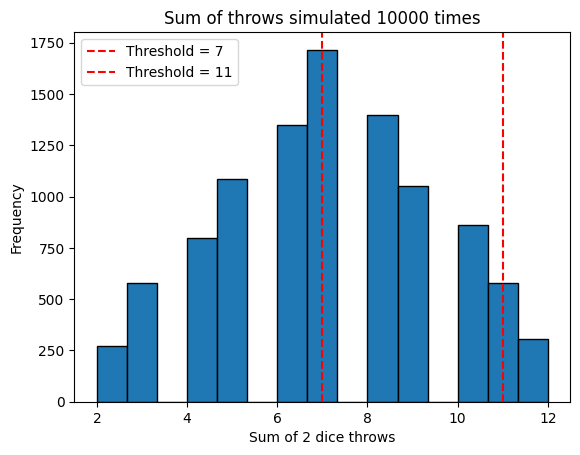

In [ ]:
est_prob_win = np.mean(sum_of_throws == 7) + np.mean(sum_of_throws == 11)
print(f"Estimated probability of winning: {est_prob_win:.4f}")
print('_'* 60)


# Optional: plot the distribution
plt.hist(sum_of_throws, bins=15, edgecolor='black')
plt.axvline(7, color='red', linestyle='dashed', label='Threshold = 7')
plt.axvline(11, color='red', linestyle='dashed', label='Threshold = 11')
plt.title("Sum of throws simulated 10000 times")
plt.xlabel("Sum of 2 dice throws")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# **Case Study: Monte Carlo Simulation of Sample Mean Distribution**


**Problem Statement:**

You are told that a population has a non-normal distribution (e.g., exponential with λ = 1). You want to understand how the Central Limit Theorem (CLT) works in practice — i.e., whether the sample mean approaches a normal distribution as the sample size increases.

**Question:**

Simulate 10,000 samples of size n = 30 and n = 100 from an exponential distribution, compute the sample mean for each, and visualize their distributions. Check if they look approximately normal.

In [ ]:
nsims = 10000
n1 = 30
n2 = 100

u1s = []
u2s = []

b1s = []
b2s = []

g1s = []
g2s = []

e1s = []
e2s = []

for j in range(nsims):

  # generate samples from non-normal distribution. In this case we will try out 3 distributions

  # uniform distribution
  u1 = np.random.uniform(0, 1, n1)
  u2 = np.random.uniform(0, 1, n2)


   # binomial distribution
  b1 = np.random.binomial(1, 0.5, n1)
  b2 = np.random.binomial(1, 0.5, n2)


  # gamma distribution
  g1 = np.random.gamma(shape = 2, scale = 1.5, size = n1)
  g2 = np.random.gamma(shape = 2, scale = 1.5, size = n2)


  # exponential distribution
  e1 = np.random.exponential(1, n1)
  e2 = np.random.exponential(1, n2)


  # find sample means
  u1s.append(np.mean(u1))
  u2s.append(np.mean(u2))

  b1s.append(np.mean(b1))
  b2s.append(np.mean(b2))

  g1s.append(np.mean(g1))
  g2s.append(np.mean(g2))

  e1s.append(np.mean(e1))
  e2s.append(np.mean(e2))

  if j % 1000 == 0:
    print(f"Finished completing {(j / 10000) * 100:.2f}% of the loop")

  if j == 10000:
    print(f"All simulations completed")



Finished completing 0.00% of the loop
Finished completing 10.00% of the loop
Finished completing 20.00% of the loop
Finished completing 30.00% of the loop
Finished completing 40.00% of the loop
Finished completing 50.00% of the loop
Finished completing 60.00% of the loop
Finished completing 70.00% of the loop
Finished completing 80.00% of the loop
Finished completing 90.00% of the loop
Finished completing 100.00% of the loop
All simulations completed


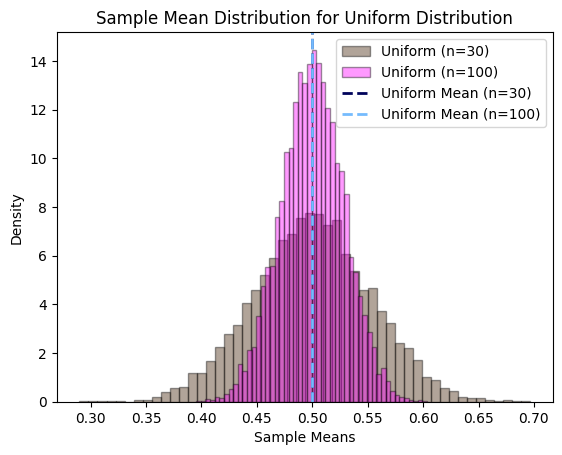

In [ ]:
# plot the distributions one by one
plt.hist(u1s, bins=50, density=True, alpha=0.4, label='Uniform (n=30)', color='xkcd:chocolate', edgecolor = 'black')
plt.hist(u2s, bins=50, density=True, alpha=0.4, label='Uniform (n=100)', color='magenta', edgecolor = 'black')
plt.axvline(np.mean(u1s), color='xkcd:dark blue', linestyle='dashed', linewidth=2, label='Uniform Mean (n=30)')
plt.axvline(np.mean(u2s), color='xkcd:sky blue', linestyle='dashed', linewidth=2, label='Uniform Mean (n=100)')

plt.title('Sample Mean Distribution for Uniform Distribution')
plt.xlabel('Sample Means')
plt.ylabel('Density') # Changed to Density since density=True is used
plt.legend()
plt.show()

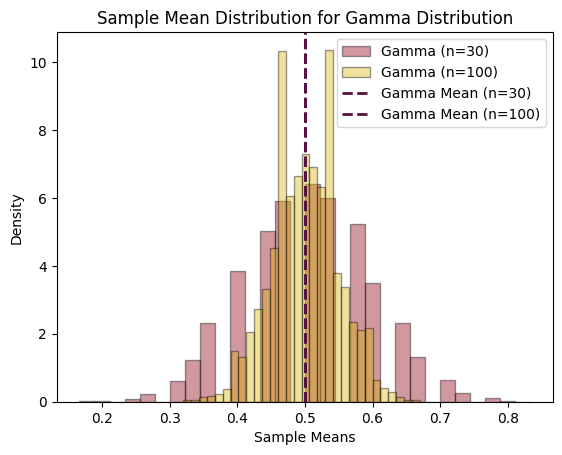

In [ ]:
# plot the distributions one by one
plt.hist(b1s, bins=30, density=True, alpha=0.4, label='Gamma (n=30)', color='xkcd:crimson', edgecolor = 'black')
plt.hist(b2s, bins=30, density=True, alpha=0.4, label='Gamma (n=100)', color='xkcd:gold', edgecolor = 'black')
plt.axvline(np.mean(u1s), color='xkcd:plum', linestyle='dashed', linewidth=2, label='Gamma Mean (n=30)')
plt.axvline(np.mean(u2s), color='xkcd:plum', linestyle='dashed', linewidth=2, label='Gamma Mean (n=100)')

plt.title('Sample Mean Distribution for Gamma Distribution')
plt.xlabel('Sample Means')
plt.ylabel('Density') # Changed to Density since density=True is used
plt.legend()
plt.show()

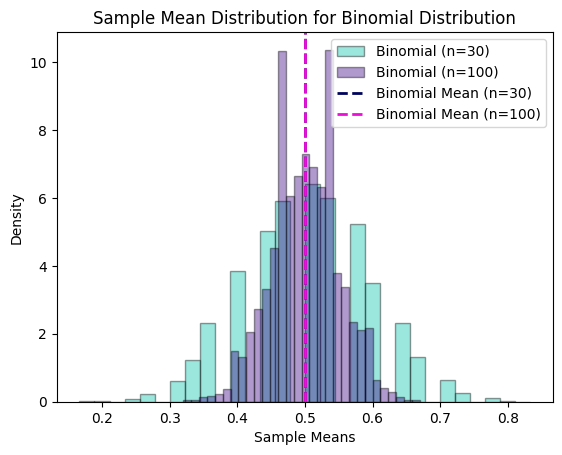

In [ ]:
# plot the distributions one by one
plt.hist(b1s, bins=30, density=True, alpha=0.4, label='Binomial (n=30)', color='xkcd:turquoise', edgecolor = 'black')
plt.hist(b2s, bins=30, density=True, alpha=0.4, label='Binomial (n=100)', color='xkcd:indigo', edgecolor = 'black')
plt.axvline(np.mean(u1s), color='xkcd:dark blue', linestyle='dashed', linewidth=2, label='Binomial Mean (n=30)')
plt.axvline(np.mean(u2s), color='xkcd:fuchsia', linestyle='dashed', linewidth=2, label='Binomial Mean (n=100)')

plt.title('Sample Mean Distribution for Binomial Distribution')
plt.xlabel('Sample Means')
plt.ylabel('Density') # Changed to Density since density=True is used
plt.legend()
plt.show()

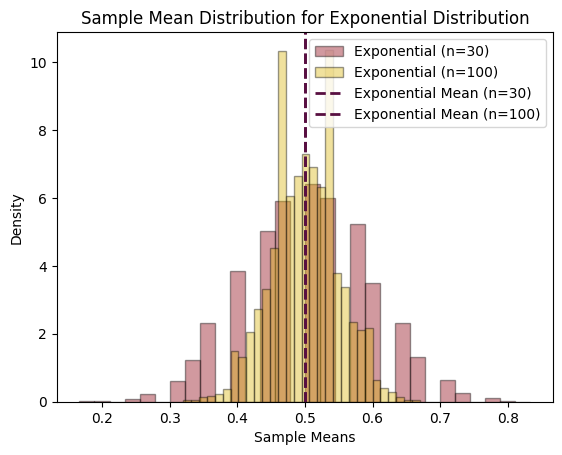

In [ ]:
# plot the distributions one by one
plt.hist(b1s, bins=30, density=True, alpha=0.4, label='Exponential (n=30)', color='xkcd:crimson', edgecolor = 'black')
plt.hist(b2s, bins=30, density=True, alpha=0.4, label='Exponential (n=100)', color='xkcd:gold', edgecolor = 'black')
plt.axvline(np.mean(u1s), color='xkcd:plum', linestyle='dashed', linewidth=2, label='Exponential Mean (n=30)')
plt.axvline(np.mean(u2s), color='xkcd:plum', linestyle='dashed', linewidth=2, label='Exponential Mean (n=100)')

plt.title('Sample Mean Distribution for Exponential Distribution')
plt.xlabel('Sample Means')
plt.ylabel('Density') # Changed to Density since density=True is used
plt.legend()
plt.show()

# **Part 1: Estimating Confidence Intervals via Monte Carlo Simulation**

In [ ]:
# let's use binomial for this one

import numpy as np
import scipy.stats as stats

# Parameters
true_mean = 0.55
simulations = 10000
sample_means = []
coverage_count = 0



z_critical = round(stats.norm.ppf(q = 0.975), 3)
print("Z-critical value:" , z_critical)

for n in [30, 50, 100, 200, 500, 1000]:

  for j in range(simulations + 1):

    draws = np.random.binomial(1, true_mean, n)
    sample_mean = np.mean(draws)
    sample_std = np.std(draws)
    se = sample_std / np.sqrt(n)

    lower_bound = sample_mean - z_critical * se
    upper_bound = sample_mean + z_critical * se

    if lower_bound <= true_mean <= upper_bound:
      coverage_count += 1

    # if j % 1000 == 0:
    #   print(f"Finished completing {(j / 10000) * 100:.2f}% of the loop")

    if j == 10000:
      print(f"All simulations completed")
      print(f"The % of times the CI includes true mean when n = {n}:  {round(coverage_count / simulations * 100, 2)}%")
      coverage_count = 0 # reset the counter





Z-critical value: 1.96
All simulations completed
The % of times the CI includes true mean when n = 30:  93.51%
All simulations completed
The % of times the CI includes true mean when n = 50:  93.24%
All simulations completed
The % of times the CI includes true mean when n = 100:  94.43%
All simulations completed
The % of times the CI includes true mean when n = 200:  94.36%
All simulations completed
The % of times the CI includes true mean when n = 500:  94.76%
All simulations completed
The % of times the CI includes true mean when n = 1000:  94.75%


In [ ]:
# now doing the same but calculating the bootstrap CI

normal_count = 0
bootstrap_count = 0

# Parameters
true_mean = 0.55
simulations = 5000
sample_means = []
coverage_count = 0

# Define a function
def bootstrap_cli(series, confidence_level, n_bootstrap_samples=1000):

  bootstrap_sample_mean = []

  for _ in range(n_bootstrap_samples):

    bootstrap_sample = np.random.choice(series, size = len(series),  replace = True)
    bs_sample_mean = np.mean(bootstrap_sample)
    bootstrap_sample_mean.append(bs_sample_mean)

  lower = np.percentile(bootstrap_sample_mean, (1 - confidence_level) / 2 * 100)
  upper = np.percentile(bootstrap_sample_mean, (1 + confidence_level) / 2 * 100)

  return lower, upper



# Run the simulations
for n in [30]:

  for j in range(simulations + 1):

    draws = np.random.binomial(1, true_mean, n)
    sample_mean = np.mean(draws)
    sample_std = np.std(draws)
    se = sample_std / np.sqrt(n)


    # Normal CI
    lower_bound = sample_mean - z_critical * se
    upper_bound = sample_mean + z_critical * se

    if lower_bound <= true_mean <= upper_bound:
      normal_count += 1


    # Bootstrap CI
    lower, upper = bootstrap_cli(draws, 0.95)

    if lower <= true_mean <= upper:
      bootstrap_count += 1

    if j % 1000 == 0:
      print(f"Finished completing {(j / 1000) * 10:.2f}% of the loop")

    if j == 5000:
      print(f"All simulations completed")
      print(f"The % of times the Normal CI includes true mean when n = {n}:  {round(normal_count / simulations * 100, 2)}%")
      print(f"The % of times the Bootstrap CI includes true mean when n = {n}:  {round(bootstrap_count / simulations * 100, 2)}%")
      bootstrap_count = normal_count = 0 # reset the counter




Finished completing 0.00% of the loop
Finished completing 100.00% of the loop
Finished completing 200.00% of the loop
Finished completing 300.00% of the loop
Finished completing 400.00% of the loop
Finished completing 500.00% of the loop
All simulations completed
The % of times the Normal CI includes true mean when n = 30:  93.32%
The % of times the Bootstrap CI includes true mean when n = 30:  93.46%


# **Part 3: Estimating Bias and Variance of an Estimator**


🎯 **Problem**


Let’s estimate the bias and variance of two estimators for the population mean of an Binomial(p = 0.5) distribution:

Estimator A: Sample mean (unbiased)

Estimator B: Sample median (biased for mean in skewed distributions)

Definitions:
Bias of estimator
𝜃
^
θ
^
 :

Bias
(
𝜃
^
)
=
𝐸
[
𝜃
^
]
−
𝜃
Bias(
θ
^
 )=E[
θ
^
 ]−θ
Variance of estimator:

Var
(
𝜃
^
)
=
𝐸
[
(
𝜃
^
−
𝐸
[
𝜃
^
]
)
2
]
Var(
θ
^
 )=E[(
θ
^
 −E[
θ
^
 ])
2
 ]
Here, true population mean of Exp(λ=1) is 1.0

Sample Mean Estimator:
  Bias     = 0.0012
  Variance = 0.0331

Sample Median Estimator:
  Bias     = 0.0032
  Variance = 0.0500


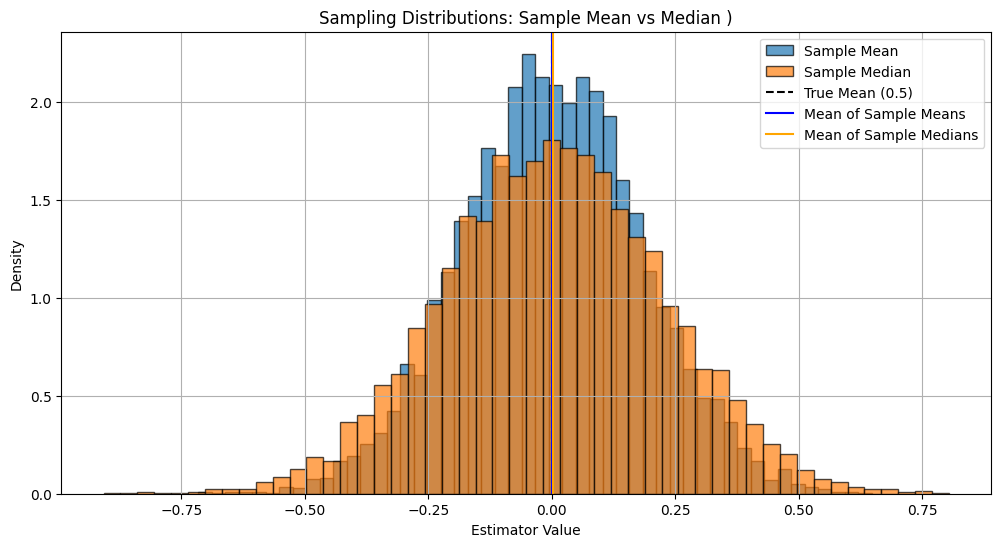

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
true_mean = 0
true_std = 1
n = 30
simulations = 10000

mean_estimates = []
median_estimates = []  # choose a bias estimator, median is a biased estimator of mean


for _ in range(simulations):
    sample = np.random.normal(loc = true_mean, scale = true_std, size=n)  # Normal
    mean_estimates.append(np.mean(sample))
    median_estimates.append(np.median(sample))


mean_estimates = np.array(mean_estimates)
median_estimates = np.array(median_estimates)

# Mean estimator
mean_bias = np.mean(mean_estimates) - true_mean
mean_variance = np.var(mean_estimates)

# Median estimator
median_bias = np.mean(median_estimates) - true_mean
median_variance = np.var(median_estimates)

print("Sample Mean Estimator:")
print(f"  Bias     = {mean_bias:.4f}")
print(f"  Variance = {mean_variance:.4f}")

print("\nSample Median Estimator:")
print(f"  Bias     = {median_bias:.4f}")
print(f"  Variance = {median_variance:.4f}")

# Plotting
plt.figure(figsize=(12, 6))

plt.hist(mean_estimates, bins=50, alpha=0.7, label='Sample Mean', density=True, edgecolor='black')
plt.hist(median_estimates, bins=50, alpha=0.7, label='Sample Median', density=True, edgecolor='black')

# Add reference lines
plt.axvline(true_mean, color='black', linestyle='dashed', linewidth=1.5, label='True Mean (0.5)')
plt.axvline(np.mean(mean_estimates), color='blue', linestyle='solid', label='Mean of Sample Means')
plt.axvline(np.mean(median_estimates), color='orange', linestyle='solid', label='Mean of Sample Medians')

plt.title("Sampling Distributions: Sample Mean vs Median )")
plt.xlabel("Estimator Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>


Normal CI coverage:    0.9570
Bootstrap CI coverage: 0.9510

Average CI Widths:
  Normal CI mean width:    0.7070
  Bootstrap CI mean width: 0.6925

Median CI Widths:
  Normal CI median width:    0.7069
  Bootstrap CI median width: 0.6913


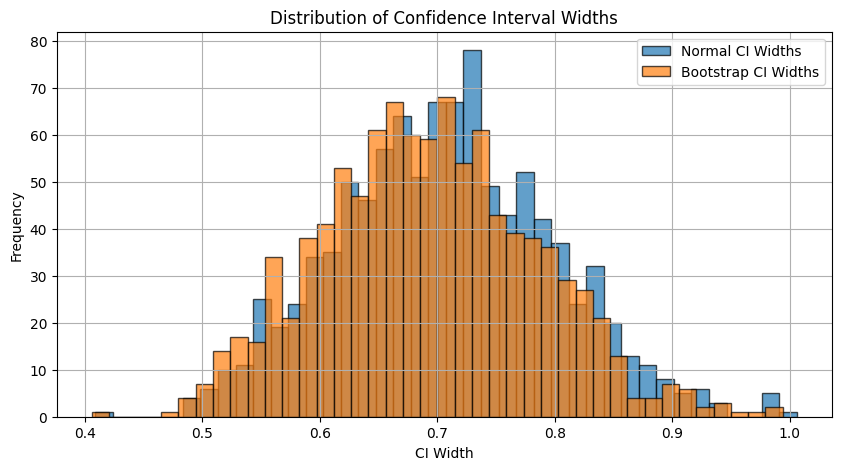

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_ci(sample, B=1000):
    n = len(sample)
    means = [np.mean(np.random.choice(sample, size=n, replace=True)) for _ in range(B)]
    return np.percentile(means, 2.5), np.percentile(means, 97.5)

# Parameters
true_mean = 0.0
n = 30
simulations = 1000

normal_cis = []
bootstrap_cis = []
contains_normal = []
contains_bootstrap = []
normal_widths = []
bootstrap_widths = []

for _ in range(simulations):
    sample = np.random.normal(loc=true_mean, scale=1.0, size=n)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / np.sqrt(n)

    # Normal-theory CI
    norm_lower = sample_mean - 1.96 * se
    norm_upper = sample_mean + 1.96 * se
    normal_cis.append((norm_lower, norm_upper))
    contains_normal.append(norm_lower <= true_mean <= norm_upper)
    normal_widths.append(norm_upper - norm_lower)

    # Bootstrap percentile CI
    boot_lower, boot_upper = bootstrap_ci(sample)
    bootstrap_cis.append((boot_lower, boot_upper))
    contains_bootstrap.append(boot_lower <= true_mean <= boot_upper)
    bootstrap_widths.append(boot_upper - boot_lower)

# Plotting
for i in range(simulations):
    # Normal CIs
    color_norm = 'green' if contains_normal[i] else 'red'
    axs[0].plot([normal_cis[i][0], normal_cis[i][1]], [i, i], color=color_norm)
    axs[0].plot(true_mean, i, 'ko', markersize=2)

    # Bootstrap CIs
    color_boot = 'green' if contains_bootstrap[i] else 'red'
    axs[1].plot([bootstrap_cis[i][0], bootstrap_cis[i][1]], [i, i], color=color_boot)
    axs[1].plot(true_mean, i, 'ko', markersize=2)

axs[0].set_title("Normal-Based 95% CIs for Mean")
axs[1].set_title("Bootstrap-Based 95% CIs for Mean")
for ax in axs:
    ax.axvline(true_mean, linestyle='dashed', color='black')
    ax.set_xlabel("Sample Mean Estimate")
    ax.set_ylabel("Simulation Index")

plt.tight_layout()
plt.show()

# Print coverage and CI width statistics
print(f"\nNormal CI coverage:    {np.mean(contains_normal):.4f}")
print(f"Bootstrap CI coverage: {np.mean(contains_bootstrap):.4f}")

print(f"\nAverage CI Widths:")
print(f"  Normal CI mean width:    {np.mean(normal_widths):.4f}")
print(f"  Bootstrap CI mean width: {np.mean(bootstrap_widths):.4f}")
print(f"\nMedian CI Widths:")
print(f"  Normal CI median width:    {np.median(normal_widths):.4f}")
print(f"  Bootstrap CI median width: {np.median(bootstrap_widths):.4f}")

# Optional: plot histogram of CI widths
plt.figure(figsize=(10, 5))
plt.hist(normal_widths, bins=40, alpha=0.7, label='Normal CI Widths', edgecolor='black')
plt.hist(bootstrap_widths, bins=40, alpha=0.7, label='Bootstrap CI Widths', edgecolor='black')
plt.title("Distribution of Confidence Interval Widths")
plt.xlabel("CI Width")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()